In [2]:
import pandas as pd
import numpy as np

##### The Pandas Series Object

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
print(data.index)
print(data.values)

RangeIndex(start=0, stop=4, step=1)
[0.25 0.5  0.75 1.  ]


In [5]:
# the index need not be an integer, but can consist of values of any desired type
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [6]:
# Series as specialized dictionary
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [7]:
# Series also supports array-style operations such as slicing
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

In [8]:
# Constructing Series objects
print(pd.Series([2, 4, 6]))
print()
print(pd.Series(5, index=[100, 200, 300]))
print()
print(pd.Series({2:'a', 1:'b', 3:'c'}))
print()
print(pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]))


0    2
1    4
2    6
dtype: int64

100    5
200    5
300    5
dtype: int64

2    a
1    b
3    c
dtype: object

3    c
2    a
dtype: object


#### The Pandas DataFrame Object

In [9]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [10]:
# Constructing DataFrame objects
print('From a single Series object')
pd.DataFrame(population, columns=['population'])

From a single Series object


,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [11]:
print('From a list of dicts')
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

From a list of dicts


,a,b
0,0,0
1,1,2
2,2,4


In [12]:
# Pandas will fill missing keys with NaN
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [13]:
print('From a dictionary of Series objects')
pd.DataFrame({'population': population,
              'area': area})

From a dictionary of Series objects


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [14]:
print('From a two-dimensional NumPy array')
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

From a two-dimensional NumPy array


,foo,bar
a,0.034533,0.546652
b,0.771314,0.614732
c,0.016337,0.365031


In [15]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [16]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [17]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [18]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [19]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [20]:
data.loc[:'New York', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [21]:
# masking and fancy indexing

data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [22]:
# indexing conventions may also be used to set or modify values

data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### Handling Missing Data

In [23]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [24]:
data.dropna()

0        1
2    hello
dtype: object

In [25]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [26]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [30]:
df.dropna(axis='columns')
# OR
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [35]:
df[3] = np.nan
print(df)

df.dropna(axis='columns', how='all')    # which will only drop rows/columns that are all null values

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN


,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [33]:
# thresh parameter lets specify a minimum number of non-null values for the row/column to be kept
df.dropna(axis='rows', thresh=3)

,0,1,2
1,2.0,3.0,5


In [36]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

##### Filling null values

In [37]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [38]:
# forward-fill to propagate the previous value forward
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [ ]:
# backward-fill to propagate the next value backward
data.fillna(method='bfill')

In [39]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


##### MultiIndex Creation

In [40]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [46]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])


MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

#### Combining Datasets: Concat and Append

In [47]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [52]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [54]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [53]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


##### One-to-one joins

In [55]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


##### Many-to-one joins

In [56]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [57]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


##### Many-to-many joins

In [58]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [59]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


##### Specification of the Merge Key

In [60]:
# The 'on' keyword
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [61]:
# The left_on and right_on keywords
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
pd.merge(df1, df3, left_on="employee", right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [62]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [63]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

In [64]:
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [65]:
df2a

,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [66]:
# method 1
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [67]:
# method 2
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


#### Example: US States Data

In [71]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [72]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [80]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [81]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [82]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [85]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [86]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [107]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [91]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [90]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
# Aggregation	    Description
# count()	    Total number of items
# first(),      last() First and last item
# mean(),       median()	Mean and median
# min(),        max()	Minimum and maximum
# std(),        var()	Standard deviation and variance
# mad()	        Mean absolute deviation
# prod()	    Product of all items
# sum()	        Sum of all items

#### GroupBy: Split, Apply, Combine
This makes clear what the groupby accomplishes:

* The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
* The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
* The combine step merges the results of these operations into an output array.

In [92]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [94]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [97]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [101]:
# Iteration over groups
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [111]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


##### Aggregate, filter, transform, apply

In [112]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [113]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [114]:
# pass a dictionary mapping column names to operations to be applied on that column
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [115]:
def filter_func(x):
    return x['data2'].std() > 4

df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [116]:
# Transformation
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [119]:
# The apply() method

def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


##### Grouping example

In [133]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


#### Pivot Tables

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [138]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [143]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [144]:
# Pivot Table Syntax

titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [146]:
age = pd.cut(titanic['age'], [0, 18, 80])   # bin the age using the pd.cut function
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [150]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [151]:
# Additional pivot table options

titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [152]:
# compute totals along each grouping
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#### Example: Birthrate Data

In [154]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [165]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


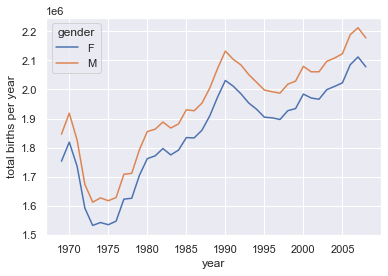

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [167]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])  # 0.74 comes from the interquartile range of a Gaussian distribution

In [169]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [177]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


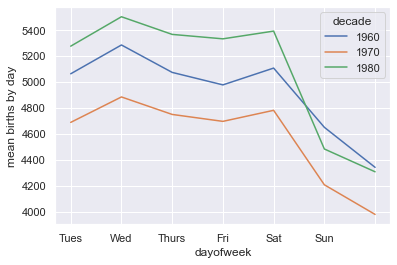

In [178]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [182]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


<AxesSubplot:>

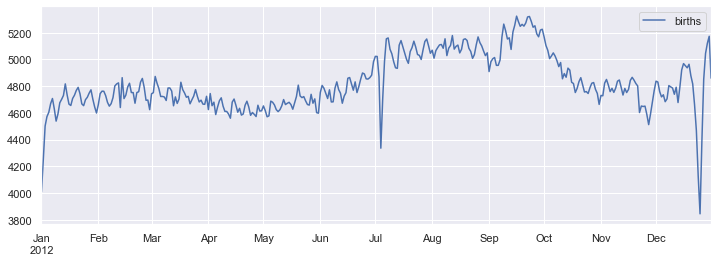

In [181]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

#### Vectorized String Operations

In [ ]:
# Pandas String Methods

# len()	        lower()	        translate()	    islower()
# ljust()	    upper()	        startswith()	isupper()
# rjust()	    find()	        endswith()	    isnumeric()
# center()	    rfind()	        isalnum()	    isdecimal()
# zfill()	    index()	        isalpha()	    split()
# strip()	    rindex()	    isdigit()	    rsplit()
# rstrip()	    capitalize()	isspace()	    partition()
# lstrip()	    swapcase()	    istitle()	    rpartition()

In [ ]:
# Methods using regular expressions

# Method	    Description
# match()	    Call re.match() on each element, returning a boolean.
# extract()	    Call re.match() on each element, returning matched groups as strings.
# findall()	    Call re.findall() on each element
# replace()	    Replace occurrences of pattern with some other string
# contains()    Call re.search() on each element, returning a boolean
# count()	    Count occurrences of pattern
# split()	    Equivalent to str.split(), but accepts regexps
# rsplit()	    Equivalent to str.rsplit(), but accepts regexps

In [183]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [186]:
# extract the first name from each by asking for a contiguous group of characters at the beginning of each element
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [188]:
# find all names that start and end with a consonant, making use of the start-of-string (^) and end-of-string ($) regular expression characters
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [ ]:
# Miscellaneous methods

# Method	            Description
# get()	            Index each element
# slice()	        Slice each element
# slice_replace()	Replace slice in each element with passed value
# cat()	            Concatenate strings
# repeat()	        Repeat values
# normalize()	    Return Unicode form of string
# pad()	            Add whitespace to left, right, or both sides of strings
# wrap()	        Split long strings into lines with length less than a given width
# join()	        Join strings in each element of the Series with passed separator
# get_dummies()	    extract dummy variables as a dataframe

##### Vectorized item access and slicing

In [189]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [191]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### Working with Time Series

In [194]:
from datetime import datetime

datetime(year=2022, month=6, day=22)

datetime.datetime(2022, 6, 22, 0, 0)

In [200]:
from dateutil import parser
date = parser.parse('22nd of June, 2016')
date

datetime.datetime(2016, 6, 22, 0, 0)

In [201]:
date.strftime('%A')

'Wednesday'

In [202]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [206]:
# Once we have this date formatted, we can quickly do vectorized operations on it:

date + np.arange(10)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13'], dtype='datetime64[D]')

In [209]:
np.datetime64('2015-07-04') # day-based datetime
np.datetime64('2015-07-04 12:00')   # minute-based datetime
np.datetime64('2015-07-04 12:59:59.50', 'ns')   # nanosecond-based time

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [ ]:
# Code	Meaning	        Time span (relative)	Time span (absolute)
# Y	    Year	        ± 9.2e18 years	        [9.2e18 BC, 9.2e18 AD]
# M	    Month	        ± 7.6e17 years	        [7.6e17 BC, 7.6e17 AD]
# W	    Week	        ± 1.7e17 years	        [1.7e17 BC, 1.7e17 AD]
# D	    Day	            ± 2.5e16 years	        [2.5e16 BC, 2.5e16 AD]
# h	    Hour	        ± 1.0e15 years	        [1.0e15 BC, 1.0e15 AD]
# m	    Minute	        ± 1.7e13 years	        [1.7e13 BC, 1.7e13 AD]
# s	    Second	        ± 2.9e12 years	        [ 2.9e9 BC, 2.9e9 AD]
# ms	Millisecond	    ± 2.9e9 years	        [ 2.9e6 BC, 2.9e6 AD]
# us	Microsecond	    ± 2.9e6 years	        [290301 BC, 294241 AD]
# ns	Nanosecond	    ± 292 years	            [ 1678 AD, 2262 AD]
# ps	Picosecond	    ± 106 days	            [ 1969 AD, 1970 AD]
# fs	Femtosecond	    ± 2.6 hours	            [ 1969 AD, 1970 AD]
# as	Attosecond	    ± 9.2 seconds	        [ 1969 AD, 1970 AD]

##### Dates and times in pandas

In [210]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [211]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

##### Pandas Time Series: Indexing by Time

In [212]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [213]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [215]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [217]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [219]:
# DatetimeIndex can be converted to a PeriodIndex
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [221]:
# A TimedeltaIndex is created, for example, when a date is subtracted from another:

dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

##### Regular sequences: pd.date_range()

In [222]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [223]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [225]:
# construct a range of hourly timestamps (default is D for day)
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [226]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [228]:
# sequence of durations increasing by an hour
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

##### Frequencies and Offsets

In [ ]:
# Code	Description	    Code	Description
# D	    Calendar day	B	    Business day
# W	    Weekly		    
# M	    Month end	    BM	    Business month end
# Q	    Quarter end	    BQ	    Business quarter end
# A	    Year end	    BA	    Business year end
# H	    Hours	        BH	    Business hours
# T	    Minutes		
# S	    Seconds		
# L	    Milliseonds		
# U	    Microseconds		
# N	    nanoseconds

# Code	Description		Code	Description
# MS	Month start		BMS	    Business month start
# QS	Quarter start	BQS	    Business quarter start
# AS	Year start		BAS	    Business year start

# Additionally, you can change the month used to mark any quarterly or 
# annual code by adding a three-letter month code as a suffix:
# Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
# A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.

# In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:
# W-SUN, W-MON, W-TUE, W-WED, etc.

In [229]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [230]:
# create a business day offset
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

#### Resampling, Shifting, and Windowing

In [336]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2000', end='2022', data_source='yahoo')
goog

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
...,...,...,...,...,...,...
2021-12-27,2968.530029,2945.000000,2949.270020,2961.280029,662800.0,2961.280029
2021-12-28,2967.489990,2918.709961,2967.489990,2928.959961,931200.0,2928.959961
2021-12-29,2943.675049,2910.090088,2928.590088,2930.090088,851100.0,2930.090088


<AxesSubplot:xlabel='Date'>

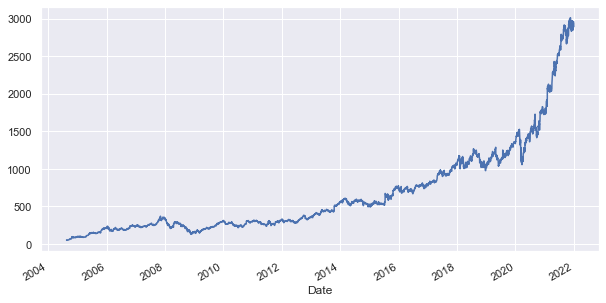

In [337]:
goog_close = goog['Close']
goog_close.plot(figsize=(10,5))

* Up-sampling : resampling at a higher frequency
* Down-sampling : resampling at a lower frequency

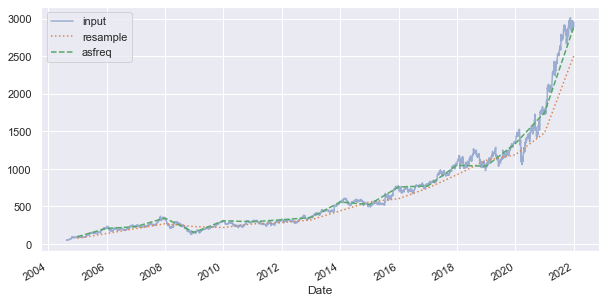

In [333]:
# let's compare what the two return when we down-sample the data. 
# Here we will resample the data at the end of business year
goog_close.plot(alpha=0.5, style='-', figsize=(10,5))
goog_close.resample('BA').mean().plot(style=':')
goog_close.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

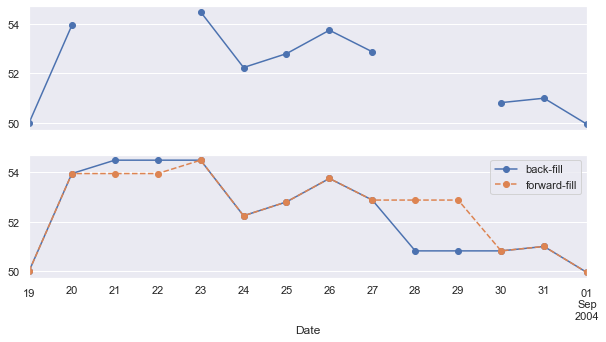

In [338]:
# up-sampling
# we will resample the business day data at a daily frequency (i.e., including weekends)
fig, ax = plt.subplots(2, sharex=True, figsize=(10,5))
data = goog_close.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"])

##### Time-shifts
* shift() - shifts the data 
* tshift()- shifts the index

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


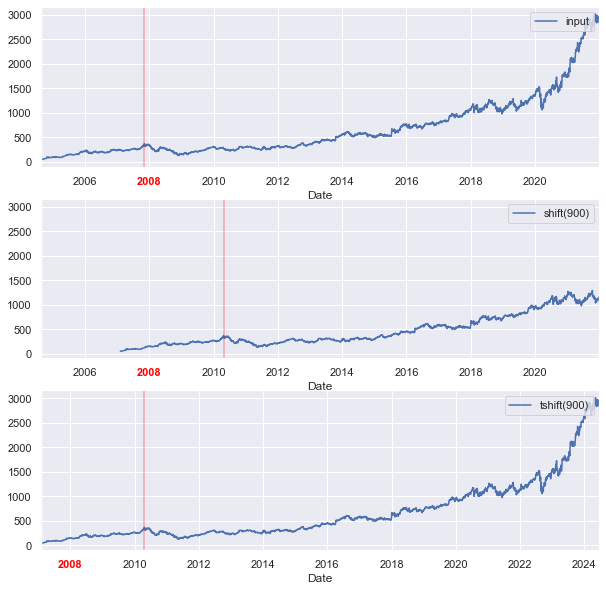

In [339]:
fig, ax = plt.subplots(3, sharey=True, figsize=(10,10))

# apply a frequency to the data
goog = goog_close.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc='upper right')
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc='upper right')
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc='upper right')
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '% Return on Investment')

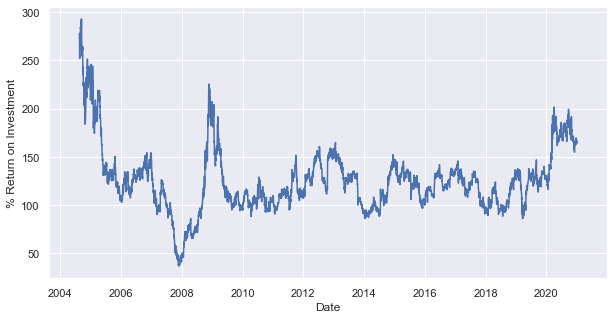

In [340]:
ROI = 100 * goog.tshift(-365) / goog - 1
ROI.plot(figsize=(10,5))
plt.ylabel('% Return on Investment')

##### Rolling windows

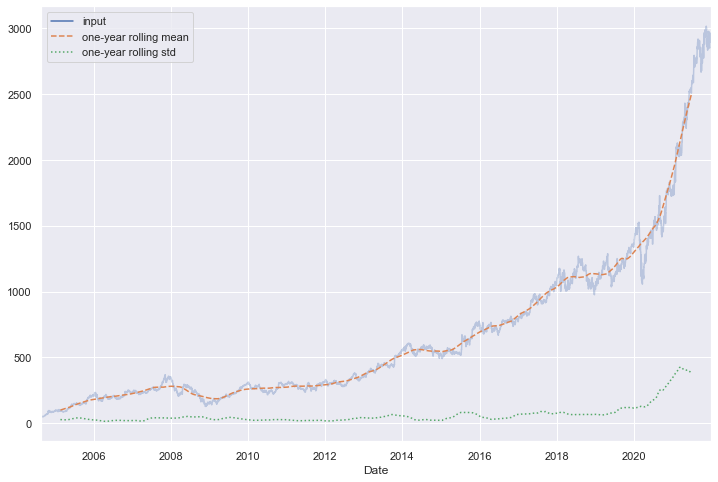

In [282]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog, 'one-year rolling mean': rolling.mean(), 'one-year rolling std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.figure.set_figheight(8)
ax.figure.set_figwidth(12)
ax.lines[0].set_alpha(0.3)

#### Example: Visualizing Seattle Bicycle Counts

In [347]:
data = pd.read_csv('data/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [296]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,150134.000000,150134.000000,150134.000000
mean,109.507420,49.640488,59.866932
std,139.596963,64.238184,86.696586
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

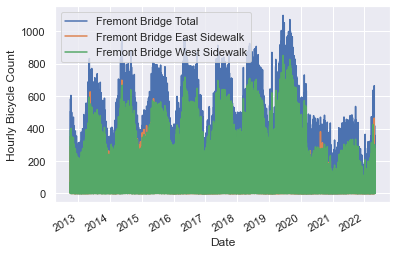

In [299]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly Bicycle Count')

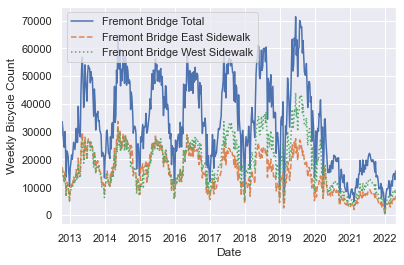

In [307]:
# resampling by week as previous plot was too dense to make sense
weekly = data.resample('W').sum()
weekly.plot(style=['-', '--', ':'])
plt.ylabel('Weekly Bicycle Count')

Text(0, 0.5, 'Mean Hourly Count')

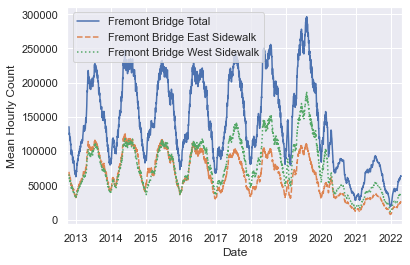

In [309]:
# 30 day rolling mean of our data, making sure to center the window
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', '--', ':'])
plt.ylabel('Mean Hourly Count')

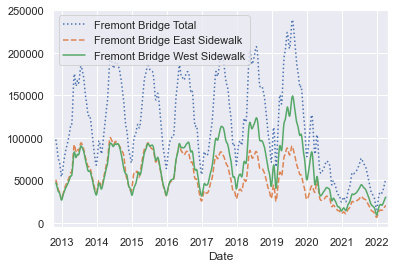

<Figure size 720x720 with 0 Axes>

In [319]:
# to get a smoother version of rolling window, use Gaussian window
# window width of 50 days and width of gaussian within the window (we chose 10 days)
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

<AxesSubplot:xlabel='time'>

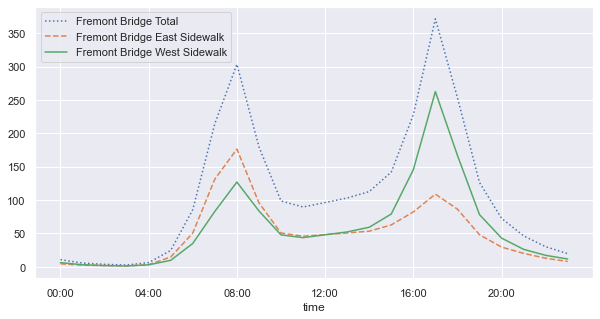

In [350]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize=(10,5))

# Interpretation:
# The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
# This is likely evidence of a strong component of commuter traffic crossing the bridge. 
# This is further evidenced by the differences between the western sidewalk 
# (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk 
# (generally used going away from downtown Seattle), which peaks more strongly in the evening.

<AxesSubplot:>

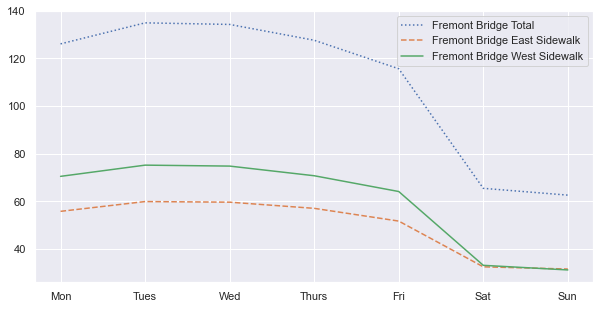

In [351]:
by_weekday = data.groupby(data.index.day_of_week).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'], figsize=(10,5))

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

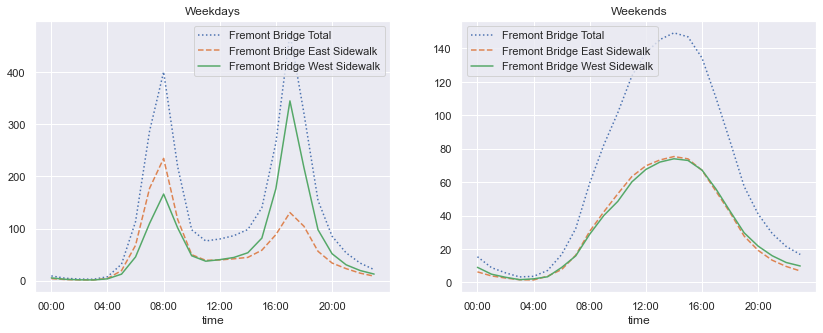

In [354]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_weekend = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_weekend.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_weekend.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-'])

# Interpretation:
# The result is very interesting: we see a bimodal commute pattern during the work week, 
# and a unimodal recreational pattern during the weekends. It would be interesting to dig through 
# this data in more detail, and examine the effect of weather, temperature, time of year, 
# and other factors on people's commuting patterns